|  Column name  |  Description  |
| ----- | ------- |
| Num_posts        | Number of total posts that the user has ever posted   |
| Num_following    | Number of following                                   |
| Num_followers    | Number of followers                                   |
| Biography_length | Length (number of characters) of the user's biography |
| Picture_availability | Value 0 if the user has no profile picture, or 1 if has |
| Link_availability| Value 0 if the user has no external URL, or 1 if has |
| Average_caption_length | The average number of character of captions in media |
| Caption_zero     | Percentage (0.0 to 1.0) of captions that has almost zero (<=3) length |
| Non_image_percentage | Percentage (0.0 to 1.0) of non-image media. There are three types of media on an Instagram post, i.e. image, video, carousel
| Engagement_rate_like | Engagement rate (ER) is commonly defined as (num likes) divide by (num media) divide by (num followers)
| Engagement_rate_comment | Similar to ER like, but it is for comments |
| Location_tag_percentage | Percentage (0.0 to 1.0) of posts tagged with location |
| Average_hashtag_count   | Average number of hashtags used in a post |
| Promotional_keywords | Average use of promotional keywords in hashtag, i.e. regrann, contest, repost, giveaway, mention, share, give away, quiz |
| Followers_keywords | Average use of followers hunter keywords in hashtag, i.e. follow, like, folback, follback, f4f|
| Cosine_similarity  | Average cosine similarity of between all pair of two posts a user has |
| Post_interval      | Average interval between posts (in hours) |
| real_fake          | r (real/authentic user), f (fake user/bought followers) |

# Q1: Import labraries

In [1]:
# write your code here ^_^
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Q2: Read instagram_users.csv file

In [17]:
# write your code here ^_^
df = pd.read_csv('instagram_users.csv')

In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64244 entries, 0 to 64243
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0    Num_posts               64244 non-null  int64  
 1   Num_following            64244 non-null  int64  
 2   Num_followers            64244 non-null  int64  
 3   Biography_length         64244 non-null  int64  
 4   Picture_availability     64244 non-null  int64  
 5   Link_availability        64244 non-null  int64  
 6   Average_caption_length   64244 non-null  int64  
 7   Caption_zero             64244 non-null  float64
 8   Non_image_percentage     64244 non-null  float64
 9   Engagement_rate_like     64244 non-null  float64
 10  Engagement_rate_comment  64244 non-null  float64
 11  Location_tag_percentage  64244 non-null  float64
 12  Average_hashtag_count    64244 non-null  float64
 13  Promotional_keywords     64244 non-null  float64
 14  Followers_keywords    

,Num_posts,Num_following,Num_followers,Biography_length,Picture_availability,Link_availability,Average_caption_length,Caption_zero,Non_image_percentage,Engagement_rate_like,Engagement_rate_comment,Location_tag_percentage,Average_hashtag_count,Promotional_keywords,Followers_keywords,Cosine_similarity,Post_interval
count,64244.000000,6.424400e+04,64244.000000,64244.000000,64244.000000,64244.000000,64244.000000,64244.000000,64244.000000,64244.000000,64244.000000,64244.000000,64244.000000,64244.000000,64244.000000,64244.000000,64244.000000
mean,179.545047,1.202470e+03,2297.041732,58.464464,0.959140,0.286673,138.822131,0.254160,0.196484,19.469109,1.158611,0.212395,0.516348,0.033296,0.053727,0.289861,504.836848
std,729.171634,2.188954e+04,2572.939318,64.228211,0.197967,0.452211,216.786922,0.339104,0.253804,122.036954,5.857458,0.301645,1.164729,0.222799,0.523365,0.341986,950.611615
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,1.310000e+02,403.000000,0.000000,1.000000,0.000000,9.000000,0.000000,0.000000,3.000000,0.090000,0.000000,0.000000,0.000000,0.000000,0.032954,29.064719
50%,31.000000,3.480000e+02,997.000000,34.000000,1.000000,0.000000,48.000000,0.055556,0.083000,9.690000,0.460000,0.000000,0.111000,0.000000,0.000000,0.133135,190.369553
75%,127.000000,8.300000e+02,3500.000000,111.000000,1.000000,1.000000,174.000000,0.444444,0.333000,18.860001,1.060000,0.357000,0.611000,0.000000,0.000000,0.431373,591.858658
max,76200.000000,3.900000e+06,8800.000000,555.000000,1.000000,1.000000,3644.000000,1.000000,1.000000,26650.000000,1009.090027,1.000000,30.000000,20.000000,58.000000,1.000000,26786.134766


# Q3: Split tha dataset into training and testing

In [20]:
#X = df['Num_posts ', 'Num_following ', 'Num_followers ','Biography_length  ', 'Picture_availability ','Link_availability' , 'Average_caption_length', 'Caption_zero','Non_image_percentage','Engagement_rate_like' ,'Engagement_rate_comment','Location_tag_percentage', 'Average_hashtag_count','Promotional_keywords','Followers_keywords','Cosine_similarity','Post_interval']
#y = df['real_fake']
X = df.drop('real_fake',axis=1)
y = df['real_fake']

In [21]:
# write your code here ^_^

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# Q4: Build three machine models 

## Q4.1: The first machine model
- Print the model's name.
- Print the model's accuracy.
- Print the model's confusion matrix.

0.852651240012452


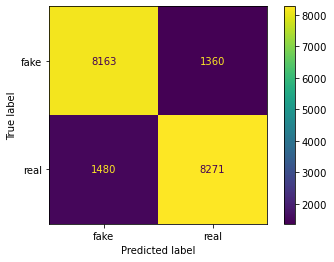

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train) #by fit we trained the model
predictions = dtree.predict(X_test)
print(accuracy_score(y_test,predictions)) # printing the accuracy
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dtree, X_test, y_test)  
plt.show()

## Q4.2: The second machine model
- Print the model's name.
- Print the model's accuracy.
- Print the model's confusion matrix.

0.852651240012452


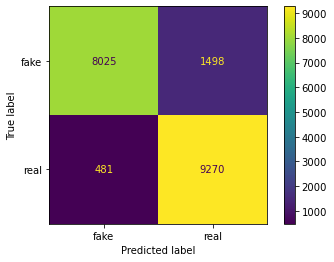

In [32]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100) #the n estimator refers to n the number of trees
rfc.fit(X_train, y_train) #training the model
rfc_pred = rfc.predict(X_test)
#print the accuracy
print(accuracy_score(y_test,predictions)) 
plot_confusion_matrix(rfc, X_test, y_test)  

## Q4.3: The third machine model
- Print the model's name.
- Print the model's accuracy.
- Print the model's confusion matrix.

0.852651240012452


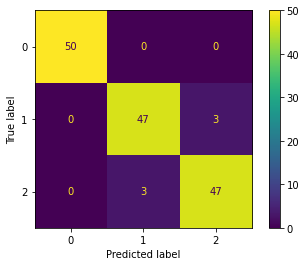

In [53]:
#Naive Bayseen 
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X, y)
v = clf.predict(X)
print(accuracy_score(y_test,predictions))
plot_confusion_matrix(clf, X, y)  

